# Project:  Investigate the Titanic Dataset

## Introduction

On April 25, 1912, the R.M.S. Titanic made a fatal collision with an iceberg in the North Atlantic Ocean; over 1,500 passengers and crew perished in the accident.  The purpose of this project will be to investigate and analyze a dataset of passengers who were aboard the Titanic.

## Questions

Upon looking at the dataset (information about the datset is provided [here](https://www.kaggle.com/c/titanic/data)), I began to pose a few questions that were interesting:

* What was the mean ticket fare?
* Where were passengers from?
* Does the ticket class a passenger has depend on age?
* Which age group was more likely to survive?
* Which gender was more likely to survive?
* Which ticket class was more likely to survive?
* Were families more likely to survive than single passengers?

## Data Wrangling

Before the analysis begins, we must take an intial look at the data to see if it has any issues that need to be addressed.

In [171]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [172]:
#read the csv
titanic = pd.read_csv('titanic-data.csv')

In [173]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Total Entries 

In [174]:
len(titanic.PassengerId)

891

There are 891 total passenger entries in the dataset.

### Missing Entries

In [175]:
#count missing entries
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Of the 891 total entries, 2 have missing entries for the passenger's port of embarkation, 177 have missing entries for passenger ages, and 687 have missing entries for passenger cabins.  Since, a majority of entries are missing from the cabin collumn of the dataset, it would be best not to use this data, and we can delete it from the dataset.

In [176]:
#delete cabin collumn from dataset
del titanic['Cabin']

That being said, we will still use the age and port of embarkation data, and simply remove the missing entries when analyzing the incomplete data.

## Analysis 

### What was the mean ticket fare?

In [177]:
#fare descriptive statistics
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

From the descriptive statistics we can see that the mean ticket fare was £32.20, or around $4,202.22 in 2017.  

Besides this, notice that the minimum fare was £0.  Perhaps someone was given a complimentary ticket or there was a stowaway.  

### Where Were Passengers From?

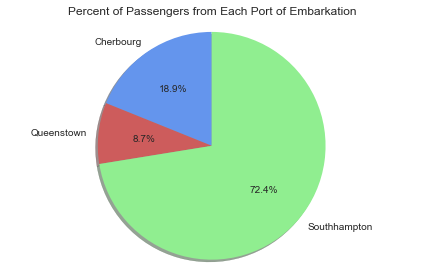

In [178]:
# Plot Pie Charts
def pie_chart(sizes, labels, colors, title):
    plt.pie(sizes, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
    plt.axis('equal')
    plt.title(title)
    plt.tight_layout()
    plt.show()

#remove rows with NaN in collumn
def remove_nan_rows(col):
    titanic_copy = titanic.copy()
    return titanic_copy.dropna(subset=[col])
    
#remove rows with NaN in Embarked collumn
titanic_remove_embarked_nan = remove_nan_rows('Embarked')

#group by ports
ports = np.array(titanic_remove_embarked_nan.groupby('Embarked', as_index = False).size())

#plot pie chart
pie_chart(ports, ['Cherbourg', 'Queenstown', 'Southhampton'], \
          ['cornflowerblue', 'indianred', 'lightgreen'], \
          'Percent of Passengers from Each Port of Embarkation')

Of the 891 passenger entries, 8.7% were from Queenstown, 18.9% were from Cherbourg, and 72.4% were from Southhampton.

### Does the ticket class a passenger has depend on age?

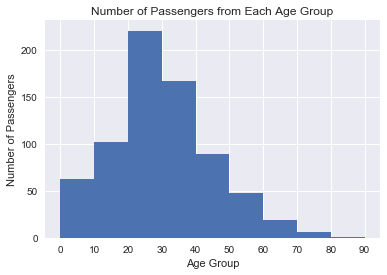

In [179]:
#remove rows with NaN in age collumn
titanic_remove_age_nan = remove_nan_rows('Age')

#histogram of passenger ages
plt.hist(titanic_remove_age_nan.Age, \
         bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers from Each Age Group')

For this analysis, passengers were sorted by their age into groups of 9 years (e.g. 0-9, 10-11, 20-23, etc.).  From the above histogram we can see that the largest age groups on the Titanic were passengers in their 20's and their 30's.

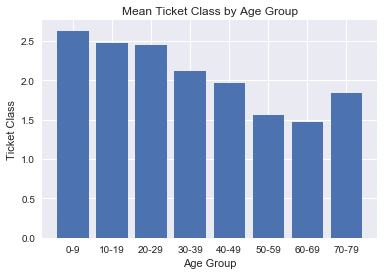

In [180]:
#Separate passengers into age groups (80 and higher removed)
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
titanic_remove_age_nan['Age_Group'] = pd.cut(titanic_remove_age_nan.Age, range(0, 81, 10), right=False, labels=age_labels)

#creates barplot
def mean_barplot(df, xvar, yvar, xlab, ylab, title, ticks):
    survival_by = df.groupby([xvar], as_index = False).mean()
    x = np.arange(len(survival_by[xvar]))
    plt.bar(x, survival_by[yvar])
    plt.xlabel(xlab)    
    plt.ylabel(ylab)
    plt.title(title)
    plt.xticks(x, ticks)
    plt.show()
    
mean_barplot(titanic_remove_age_nan, 'Age_Group', 'Pclass', 'Age Group', \
            'Ticket Class', 'Mean Ticket Class by Age Group', age_labels)    

Here we see that there is negative correlation between age group and mean ticket class.  Perhaps older passengers have amassed more wealth during their lifetime compared to younger people, and thus can afford to buy the higher class tickets?  Statistical tests must be performed to see if this holds true.

### Which age group was more likely to survive?

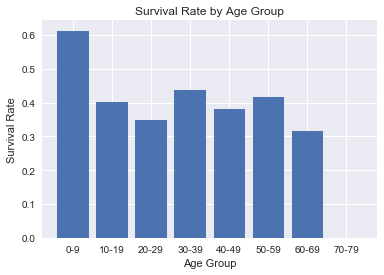

In [181]:
mean_barplot(titanic_remove_age_nan, 'Age_Group', 'Survived', 'Age Group', 'Survival Rate',\
                     'Survival Rate by Age Group', age_labels)

This visualization shows the mean survival rate for each age group.  For this graph, since there was only one passenger aged 80 and higher, I decided to omit that persons survival rate.

Survival rates appear similar across the board, around 40%, except for the age group of 0-9 years, which has a mean survival rate of 61.3%.  Thus, it appears there is being in this age group saw higher rates of survival.

Keep in mind, since we are missing a portion of the data for passenger ages, there is a possibility the true survival rates could be very different from what this data is telling us.

However, we do know that Titanic's Captain, Edward Smith, ordered that women and children be allowed to board the lifeboats first during the Titanic's evacauation, and this may account for the higher survival rates for passengers in the 0-9 age group.

### Which gender was more likely to survive?

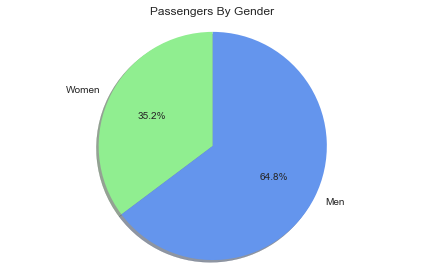

In [182]:
#array counting number of men and women
men_women = np.array(titanic.groupby('Sex', as_index = False).size())

pie_chart(men_women, ['Women', 'Men'], ['lightgreen', 'cornflowerblue'], 'Passengers By Gender')   

Of the 891 passenger entries in this dataset, 35.2% were women and 64.8% were men.

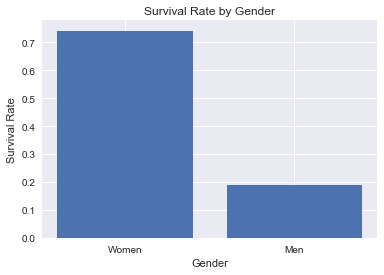

In [183]:
#Assign dummy variables for passenger's gender
titanic['Sex_Binary'] =  titanic.Sex.map({'female': 0, 'male': 1}, ) 

mean_barplot(titanic, 'Sex_Binary', 'Survived', 'Gender', 'Survival Rate',\
                     'Survival Rate by Gender', ['Women', 'Men'])

The above visualization shows the mean survival rates for women and men respectively.

We can see that the mean survival rate for men is 18.9% compared to 72.4% for women--more than twice that of the men's.  Therefore, there appears to be correlation between survival rate and gender.  

One possible account for the correlation is the "Women and Children First" order, allowing more women to escape the Titanic.  Another factor could be that there were simply more men aboard the ship, and thus more men that had to be evacuated than women.

### Which ticket class was more likely to survive?

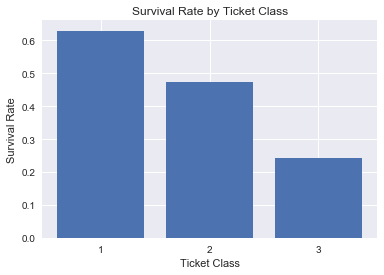

In [184]:
mean_barplot(titanic, 'Pclass', 'Survived', 'Ticket Class', 'Survival Rate',\
                     'Survival Rate by Ticket Class', ['1', '2', '3'])

From this bar graph of survival rate by ticket class it appears there is negative correlation between ticket class and survival rate.

There are several possibilities for why this occurred:  

First, it could be that more first class passengers were placed near the center of the ship and above deck, and hence closer to the lifeboats.  On the other hand, third class passengers were placed near the bow and stern of the ship, where they were farther from the lifeboats.  Furthermore, those in the stern were closer to the compartments damaged by the iceberg.
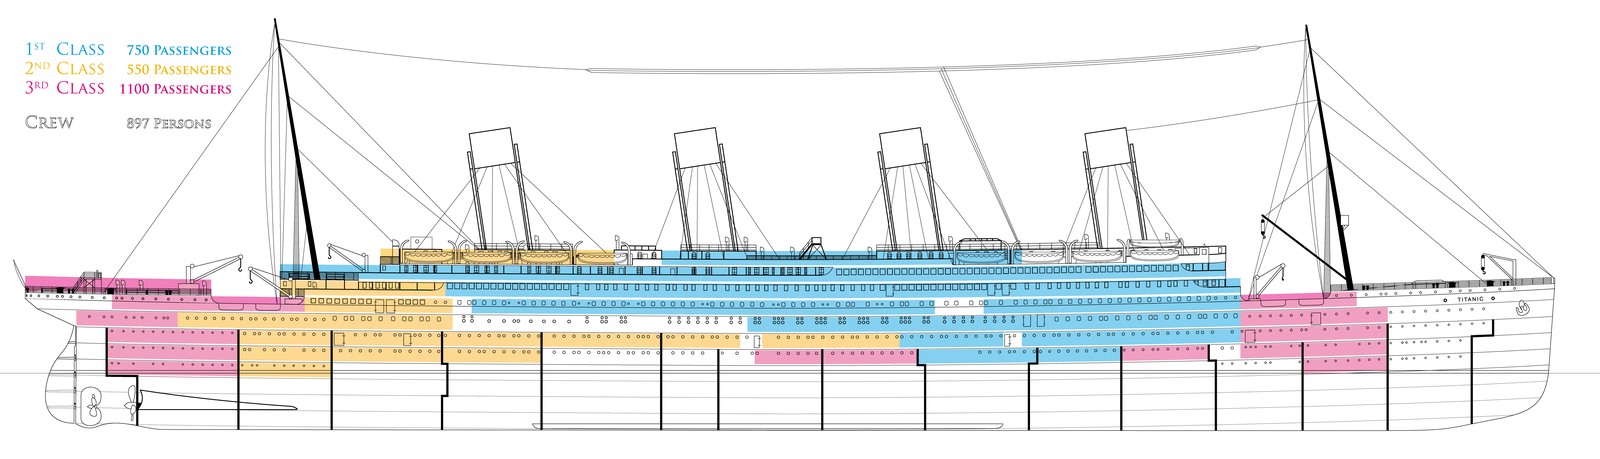

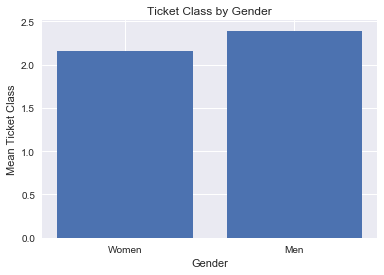

In [185]:
mean_barplot(titanic, 'Sex_Binary', 'Pclass', 'Gender', 'Mean Ticket Class',\
                     'Ticket Class by Gender', ['Women', 'Men'])

Another possibility considered was that there were less children and less women travelling in third class, which would bring down the third class survival rate.  Yet, as seen earlier in the "Mean Ticket Class by Age Group" bar graph, we saw that there were actually more children travelling in third class.  Furthermore, based on the bar graph above, the mean ticket class appears roughly the same for men and women, so this scenario seems unlikely.

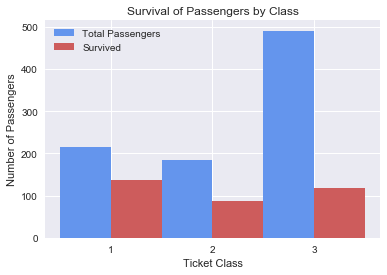

In [186]:
#groupby ticket class and survived and count the size of each group
survival_by_pclass = titanic.groupby(['Pclass', 'Survived']).size()
#list of number of survived by ticket class
survived = [survival_by_pclass.iloc[1], survival_by_pclass.iloc[3], survival_by_pclass.iloc[5]]
#list of total passengers in each ticket class
total_pclass = [survival_by_pclass.iloc[1] + survival_by_pclass.iloc[0],\
                survival_by_pclass.iloc[3] + survival_by_pclass.iloc[2],\
                survival_by_pclass.iloc[5] + survival_by_pclass.iloc[4]]

#plotting bar graph
x = np.array([0, 1, 2])
bar_width = 0.5
plt.bar(x, total_pclass, bar_width, color = 'cornflowerblue', label = 'Total Passengers')
plt.bar(x + 0.5, survived, bar_width, color = 'indianred', label = 'Survived')
plt.legend()
plt.xlabel('Ticket Class')
plt.ylabel('Number of Passengers')
plt.title('Survival of Passengers by Class')
plt.xticks([0.25, 1.25, 2.25], ['1', '2', '3'])
plt.show()

The final explanation considered was that there were simply many more third class passengers that had to be evacuated, which would bring down the overall survival rate for third class passengers.  Examining the survival of passengers by class, we see that there were more third class passengers than first and second class passengers, yet the amount of passengers who survive is about the same for third class and first class; so this could be a possible factor.

### Were families more likely to survive?

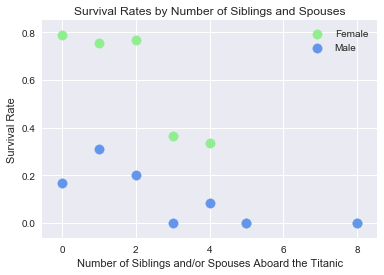

In [187]:
#scatterplot
def survival_scatter(groups, title, xlab, ylab):
    
    def sibsp_scatter(binary, color):
        plt.scatter(survival_by[groups[1]][survival_by['Sex_Binary'] == binary] , \
        survival_by['Survived'][survival_by['Sex_Binary'] == binary],
        color = color, s = 90)
    
    survival_by = titanic.groupby(groups, as_index = False).mean()
    women = sibsp_scatter(0, 'lightgreen')
    men = sibsp_scatter(1, 'cornflowerblue')
    plt.legend(['Female', 'Male'])
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

survival_scatter(['Sex_Binary', 'SibSp'], 'Survival Rates by Number of Siblings and Spouses', \
                'Number of Siblings and/or Spouses Aboard the Titanic', 'Survival Rate')

In the above visualization, the goal was find out how people with a large amount of siblings aboard the Titanic fared when compared to people with only a few siblings, in regards to survival.  Since we know men and women appear to have different mean survival rates, we can group the data by males and females.

That said, one limitation with this data is that it is difficult to tell which passengers were children and which were adults.  To remedy this, let's group the data again by adults and children, where we define anyone 18 years and older to be an adult and anyone under 18 to be a child.

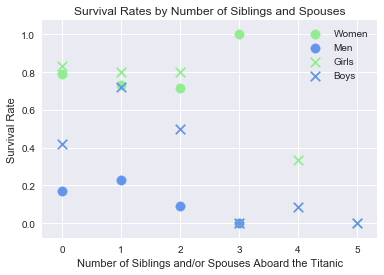

In [188]:
#Create dummy variables for gender
titanic_remove_age_nan['Sex_Binary'] =  titanic_remove_age_nan.Sex.map({'female': 0, 'male': 1}, ) 

#Creates scatterplot
def survival_scatter_adults_children(groups, age_of_majority, title, xlab, ylab):
    #Plots the scatterplot adult data
    def sibsp_scatter_adults(binary, color):
        survival_by = titanic_remove_age_nan[titanic_remove_age_nan['Age'] >= age_of_majority].groupby(groups, as_index = False).mean()
        plt.scatter(survival_by[groups[1]][survival_by['Sex_Binary'] == binary] , \
        survival_by['Survived'][survival_by['Sex_Binary'] == binary],
        marker = 'o', color = color, s = 90)
        
    #Plots the scatterplot children data    
    def sibsp_scatter_children(binary, color):
        survival_by = titanic_remove_age_nan[titanic_remove_age_nan['Age'] < age_of_majority].groupby(groups, as_index = False).mean()
        plt.scatter(survival_by[groups[1]][survival_by['Sex_Binary'] == binary], \
        survival_by['Survived'][survival_by['Sex_Binary'] == binary],
        marker = 'x', color = color, s = 90)
    
    survival_by = titanic.groupby(groups, as_index = False).mean()
    women = sibsp_scatter_adults(0, 'lightgreen')
    men = sibsp_scatter_adults(1, 'cornflowerblue')
    girls = sibsp_scatter_children(0, 'lightgreen')
    boys = sibsp_scatter_children(1, 'cornflowerblue')
    plt.legend(['Women', 'Men', 'Girls', 'Boys'])
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()
    
survival_scatter_adults_children(['Sex_Binary', 'SibSp',], 18, 'Survival Rates by Number of Siblings and Spouses', \
                'Number of Siblings and/or Spouses Aboard the Titanic', 'Survival Rate')

Here we can see that children with lower numbers of siblings tend to fare better than men which is to be expected.  Among these children, girls tend to fare slightly better than women, but boys appear to have a lower mean survival rate than women and girls, which could be because boys in their late teens may have been considered as men when it came time to board the lifeboats.

Another thing to point out, is that there seems to be negative correlation between number of siblings survival rates.  Why could this be?

One explanation is that large families could have become split up during the chaos following the iceberg collision, and children who were split up would have a lower survival rate.

Let's explore another possibility, by looking at the mean ticket class for people with greater than 2 siblings.

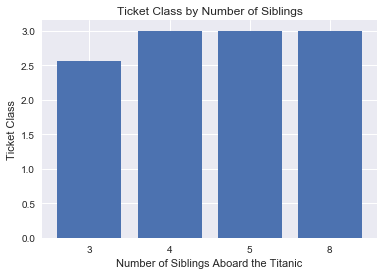

In [189]:
mean_barplot(titanic[titanic.SibSp > 2], 'SibSp', 'Pclass', 'Number of Siblings Aboard the Titanic',
             'Ticket Class', 'Ticket Class by Number of Siblings', [3, 4, 5, 8])

We can see that the mean ticket class is near third class for people with 3 siblings and exactly third class for people with 4, 5, and 8 siblings.  It is possible people with large amounts of siblings would all book their cabins in third class to cut costs on their ticket fares.  So the low survival rates for people with many siblings may be related to the fact that third class passengers had a lower mean survival rate than first and second class passengers.

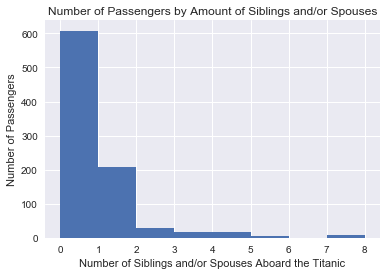

In [190]:
plt.hist(titanic.SibSp, \
         bins = [0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.xlabel('Number of Siblings and/or Spouses Aboard the Titanic')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers by Amount of Siblings and/or Spouses')

Finally, another option could be that the number of people with many siblings aboard the titanic were small, as shown by the histogram above.  This presents the possibility that the number of people with many siblings and that survived are underrepresented in the dataset.

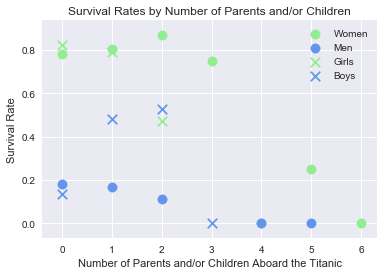

In [191]:
survival_scatter_adults_children(['Sex_Binary', 'Parch'], 18, 'Survival Rates by Number of Parents and/or Children', \
                'Number of Parents and/or Children Aboard the Titanic', 'Survival Rate')

Let's do a similar analysis to what we did above, instead this time examining the mean survival rate by the number of parents and/or children on the Titanic.  Again, passengers were grouped by gender and adulthood.

Here we see a similar situation to before, where instead of children with many siblings having a low survival rate, it is parents with many children having a low survival rate.

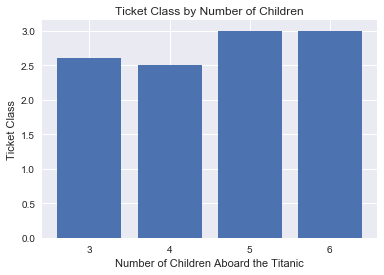

In [192]:
mean_barplot(titanic[titanic.Parch > 2], 'Parch', 'Pclass', 'Number of Children Aboard the Titanic',
             'Ticket Class', 'Ticket Class by Number of Children', [3, 4, 5, 6])

Parents with more than 2 children had high mean ticket classes, and this could be a case where having a large familiy is correlated with ticket class and thus negatively correlated with survival rate.  Finding evidence of causality will require statistical testing.

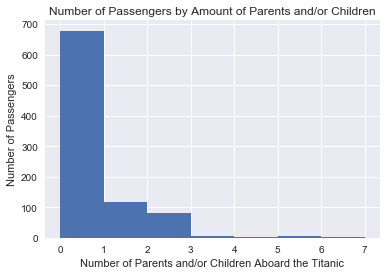

In [193]:
plt.hist(titanic.Parch, \
         bins = [0, 1, 2, 3, 4, 5, 6, 7])
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7])
plt.xlabel('Number of Parents and/or Children Aboard the Titanic')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers by Amount of Parents and/or Children')

Alternatively, this could be a matter of there being not many passengers with large families, and people with many children who survived are underrepresented.

Another interesting thing is that girls with 2 parents and/or siblings have about the same survival rate as boys.  The reason for why this was, was unclear and more data will be needed to answer this question.

In addition, it also seems that boys travelling with a nanny (i.e. they have zero parents in the dataset), have a survival rate almost equivalent to that of the men.  Let's see if we can find out more about this particular group of passengers.

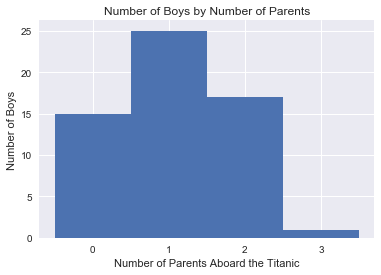

In [194]:
#separates data for passengers under 18
boys_zero_parch = titanic_remove_age_nan[titanic_remove_age_nan['Age'] < 18]
#separates data for male passengers
boys_zero_parch = boys_zero_parch[boys_zero_parch['Sex_Binary'] == 1]
plt.hist(boys_zero_parch.Parch, \
        bins = [-0.5, 0.5, 1.5, 2.5, 3.5])
plt.xticks([0, 1, 2, 3])
plt.xlabel('Number of Parents Aboard the Titanic')
plt.ylabel('Number of Boys')
plt.title('Number of Boys by Number of Parents')

We can first check if there is an unusually low amount of boys travelling with nannies aboard the titanic.  From the above visualization we can see that it appears about the same as the number of boys travelling with 2 parents.

Since there is nothing out of the ordinary with the number of passengers, it could be that the way we defined adulthood could be a problem.  Recall that we defined any passenger under 18 years of age to be a child.  However, it could be that boys of age 17 and 16 would have been independent and responsible enough to make the voyage across the Atlantic on their own.  Therefore, let us redefine the age of majority as being 16 this time.

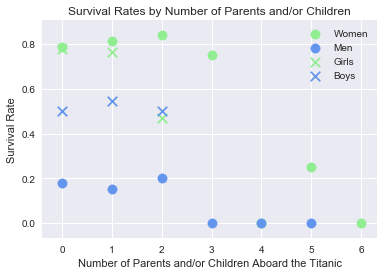

In [195]:
survival_scatter_adults_children(['Sex_Binary', 'Parch'], 16, 'Survival Rates by Number of Parents and/or Children', \
                'Number of Parents and/or Children Aboard the Titanic', 'Survival Rate')

Now that we have changed the age of majority, the mean survival rate for boys with 0 parents on the Titanic looks similar to the mean survival rate for boys with 1 or 2 parents:  around 50%, so this could account for the low survival rate.

## Conclusion

### Results

The main thing to take away from this data analysis is that some groups of passengers saw better survival rates than others:  Children under the age of 10, women, 1st class passengers, and smaller families saw the highest mean survival rates in each of their respective categories.

### Limitations

The findings of this project are limited for the following reasons:

1.  The dataset was not the full passenger and crew list for the Titanic, therefore, the selection of this dataset could mean our results are different from the entire Titanic data.
2.  There were numerous missing entries in the data, and ommiting entries with missing data may have had a similar affect on the results as above.
3.  Finally, any correlation pointed out in this project, does not imply causation.  To determine if one factor produces a change in another factor, statistical tests must be carried out.

## References

[Dataset](https://www.kaggle.com/c/titanic/data) provided by Kaggle.

History.com Staff. "Titanic." History.com. A&E Television Networks, 2009. Web. 23 July 2017. <http://www.history.com/topics/titanic>.


Cohen, Jennie. "'Women and Children First'? On Sinking Ships, It's Every Man for Himself." History.com. A&E Television Networks, 02 Aug. 2012. Web. 23 July 2017. <http://www.history.com/news/women-and-children-first-on-sinking-ships-its-every-man-for-himself>.

Eric W. Nye.  "Pounds Sterling to Dollars: Historical Conversion of Currency."  University of Wyoming.  Web.  25 July 2017. <http://www.uwyo.edu/numimage/currency.htm>.

Wooley, Joe.  2013.  Web.  24 July 2017. <https://www.encyclopedia-titanica.org/files/1/figure-one-side-view.gif>

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html

https://pythonspot.com/en/matplotlib-pie-chart/

https://www.youtube.com/watch?v=in8LJ-aR8T8&index=11&list=FLurR4-Efg0eUdRg7mq1HZhg&t=660s